# Colab에서 MeCab 활용하기
강의자료 : https://docs.google.com/presentation/d/1i_j8EkXksQAOTVWWmZ9ln-cLQ-18bhHbYT4B3eQ9wbE/edit?usp=sharing

##Colab 동작 환경 확인


In [1]:
# OS 확인
!cat /etc/issue.net

Ubuntu 18.04.3 LTS


In [2]:
# 하드웨어 사양 체크
# CPU
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.188
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 400

In [3]:
# Memory
!cat /proc/meminfo

MemTotal:       13333560 kB
MemFree:        10814592 kB
MemAvailable:   12495236 kB
Buffers:           69152 kB
Cached:          1771456 kB
SwapCached:            0 kB
Active:           698224 kB
Inactive:        1567756 kB
Active(anon):     405408 kB
Inactive(anon):      308 kB
Active(file):     292816 kB
Inactive(file):  1567448 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               240 kB
Writeback:             0 kB
AnonPages:        425320 kB
Mapped:           220608 kB
Shmem:               864 kB
Slab:             157264 kB
SReclaimable:     122600 kB
SUnreclaim:        34664 kB
KernelStack:        3504 kB
PageTables:         5116 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666780 kB
Committed_AS:    2540532 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              912 kB
AnonHugePages:   

In [4]:
#Disk
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   29G   75G  28% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1       114G   30G   85G  27% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [5]:
#GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Google Drive 연결하기

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
!pwd

/content


In [8]:
!ls

gdrive	sample_data


##MeCab 설치하기

In [12]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [13]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab


In [14]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 230kB/s 
     |████████████████████████████████| 2.3MB 47.5MB/s 
     |████████████████████████████████| 92kB 12.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-01-17 04:16:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [0]:
# 실행 테스트
import MeCab

In [0]:
tagger = MeCab.Tagger()

In [17]:
sentence = '이제 Colab에서 Mecab-ko-dic 사용이 가능합니다.'
print (tagger.parse(sentence))

이제	MAG,성분부사|시간부사,F,이제,*,*,*,*
Colab	SL,*,*,*,*,*,*,*
에서	JKB,*,F,에서,*,*,*,*
Mecab	SL,*,*,*,*,*,*,*
-	SY,*,*,*,*,*,*,*
ko	SL,*,*,*,*,*,*,*
-	SY,*,*,*,*,*,*,*
dic	SL,*,*,*,*,*,*,*
사용	NNG,행위,T,사용,*,*,*,*
이	JKS,*,F,이,*,*,*,*
가능	NNG,정적사태,T,가능,*,*,*,*
합니다	XSA+EF,*,F,합니다,Inflect,XSA,EF,하/XSA/*+ᄇ니다/EF/*
.	SF,*,*,*,*,*,*,*
EOS



In [18]:
# 설치 후 Tagger 에러가 발생한 경우
# https://github.com/konlpy/konlpy/issues/144
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
import os
os.chdir('mecab-python-0.996')
!python setup.py build
!python setup.py install

Cloning into 'mecab-python-0.996'...
remote: Counting objects: 17, done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 3), reused 0 (delta 0)
Unpacking objects: 100% (17/17), done.
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
copying MeCab.py -> build/lib.linux-x86_64-3.6
running build_ext
building '_MeCab' extension
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/include -I/usr/include/python3.6m -c MeCab_wrap.cxx -o build/temp.linux-x86_64-3.6/MeCab_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.6/MeCab_wrap.o -L/usr/local/lib -lmecab -lstdc

### MeCab 사용자 사전 추가하기

In [19]:
cd /content/mecab-ko-dic-2.1.1-20180720/

/content/mecab-ko-dic-2.1.1-20180720


In [20]:
ls

aclocal.m4      EF.csv       MAJ.csv      NorthKorea.csv     tools/
AUTHORS         EP.csv       Makefile     NP.csv             unk.def
autogen.sh*     ETM.csv      Makefile.am  NR.csv             unk.dic
ChangeLog       ETN.csv      Makefile.in  Person-actor.csv   user-dic/
char.bin        feature.def  matrix.bin   Person.csv         VA.csv
char.def        Foreign.csv  matrix.def   Place-address.csv  VCN.csv
clean*          Group.csv    missing*     Place.csv          VCP.csv
CoinedWord.csv  Hanja.csv    MM.csv       Place-station.csv  VV.csv
config.log      IC.csv       model.bin    pos-id.def         VX.csv
config.status*  Inflect.csv  model.def    Preanalysis.csv    Wikipedia.csv
configure*      INSTALL      NEWS         README             XPN.csv
configure.ac    install-sh*  NNBC.csv     rewrite.def        XR.csv
COPYING         J.csv        NNB.csv      right-id.def       XSA.csv
dicrc           left-id.def  NNG.csv      Symbol.csv         XSN.csv
EC.csv          MAG.csv      NN

In [21]:
ls user-dic/

nnp.csv  person.csv  place.csv  README.md


In [22]:
# 사용자 사전에 미리 등록되어있는 고유명사
!cat user-dic/nnp.csv

대우,,,,NNP,*,F,대우,*,*,*,*,*
구글,,,,NNP,*,T,구글,*,*,*,*,*


In [23]:
# 기존 양식을 복사해서 일반명사 사전을 생성
!cp user-dic/nnp.csv user-dic/nng.csv
!ls user-dic/

nng.csv  nnp.csv  person.csv  place.csv  README.md


**1.Colab 안에서 직접 단어 추가하기**

In [24]:
# 사전에 등록할 단어 추가
!echo "Mecab-ko-dic,,,,NNG,*,T,Mecab-ko-dic,*,*,*,*,*" >> user-dic/nng.csv
!cat user-dic/nng.csv

대우,,,,NNP,*,F,대우,*,*,*,*,*
구글,,,,NNP,*,T,구글,*,*,*,*,*
Mecab-ko-dic,,,,NNG,*,T,Mecab-ko-dic,*,*,*,*,*


**2.텍스트 파일로 로컬에서 수정 후 추가하기**

In [0]:
# nng.csv 파일 이동
mv /content/mecab-ko-dic-2.1.1-20180720/user-dic/nng.csv /content/gdrive/'My Drive'/'Colab Notebooks'/

In [26]:
# 로컬에서 파일 수정 후 재 업로드
cat /content/gdrive/'My Drive'/'Colab Notebooks'/nng.csv

대우,,,,NNP,*,F,대우,*,*,*,*,*
구글,,,,NNP,*,T,구글,*,*,*,*,*
Mecab-ko-dic,,,,NNG,*,T,Mecab-ko-dic,*,*,*,*,*


In [27]:
# 업로드된 수정 파일 이동
!mv /content/gdrive/'My Drive'/'Colab Notebooks'/nng.csv /content/mecab-ko-dic-2.1.1-20180720/user-dic/
!ls user-dic/

nng.csv  nnp.csv  person.csv  place.csv  README.md


In [28]:
# 개인사전 업데이트
!bash ./tools/add-userdic.sh

generating userdic...
nng.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nng.csv ... 
done!
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading

In [29]:
# 재설치
!sudo make install

make[1]: Entering directory '/content/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/content/mecab-ko-dic-2.1.1-20180720'


In [30]:
# 등록된 사전 확인
tagger = MeCab.Tagger()
print (tagger.parse(sentence))

이제	MAG,성분부사|시간부사,F,이제,*,*,*,*
Colab	SL,*,*,*,*,*,*,*
에서	JKB,*,F,에서,*,*,*,*
Mecab-ko-dic	NNG,*,T,Mecab-ko-dic,*,*,*,*,*
사용	NNG,행위,T,사용,*,*,*,*
이	JKS,*,F,이,*,*,*,*
가능	NNG,정적사태,T,가능,*,*,*,*
합니다	XSA+EF,*,F,합니다,Inflect,XSA,EF,하/XSA/*+ᄇ니다/EF/*
.	SF,*,*,*,*,*,*,*
EOS



실제 문장 실습 시작

In [33]:
ls /content/gdrive/'My Drive'/dongguk_nlp/review_data/

extreme_job_review2.txt  test_data_12.csv  test_data_14.csv
test_data_11.csv         test_data_13.csv


In [0]:
import MeCab
import pandas as pd
import numpy as np

In [35]:
tagger = MeCab.Tagger()
with open('/content/gdrive/My Drive/dongguk_nlp/review_data/extreme_job_review2.txt','r',encoding='utf-8') as f:
    my_sentence=f.read()
my_sentence

'<아 재밌다!! 또 봐야지!!>\n코미디 영화의 미덕은 뭐니 뭐니 해도 웃기는 거다.\n다만 그 소재와 방법이 개개인의 취향에 들어맞느냐가 관건인데 이 영화는 딱 내 취향이었다.\n스물로 코미디 영화의 장인이라는 이미지가 각인된 이병헌 감독의 작품답게 작정하고 웃기려는 시도가 영화 내내 이어진다. 근데 이게 참 타율이 무척 높다.\n초반에는 너무 뻔하다 싶었던 개그코드들이 중반을 넘어서 후반으로 가면서부터 캐릭터와 상황들과 잘 맞아떨어지면서 웃음폭탄이 터진다. 별거 아닐 수도 있고 병맛일수도 있는데 그냥 막무가내로 웃긴다.\n그냥 생각 없이, 혹은 가볍게 웃을 수 있는 영화를 찾는다면 딱일 듯!!!\n배우들의 연기와 캐릭터도 참 좋았다.\n류승룡 배우는 드디어 딱 맞는 옷을 입은 듯... 염력에선 영화와 맞지 않는 옷을 입은듯했지만 이 영화에선 찰떡이었다. 특히나 후반부에서 터지는 액션과 개그는 정신 못 차리고 웃게 만든다ㅋㅋㅋㅋ\n개인적으로 가장 큰 수확이었던 건 진선규 배우의 캐릭터.\n왠지 모르게 떠오르는 이미지가 있는데 그걸 억지로 비틀지 않고 교묘히 잘 사용해서 웃음을 터트린다.\n믿음직한 조연으로 잘 자리 잡아가는 거 같아서 괜히 흐뭇...\n이하늬 배우는 솔직히 큰 기대 안 했는데 진선규 배우와의 호흡이 너무 좋았다. \n다소 거칠고 털털한 캐릭터를 잘 살려준 듯...\n이동휘 배우는 기대보단 못했던 활약이지만 캐릭터의 성향상 그게 맞는듯한데 그래도 특유의 개그감은 잃지 않은 듯...\n공명 배우는 이번에 처음 봤는데 이름을 기억하게 될 정도로 연기가 인상 깊었다.\n특히나 후반부 액션신에선 씬스틸러였음ㅋㅋㅋㅋㅋ\n악역으로 등장했던 신하균, 오정세 배우들도 역시나 이름에 걸맞은 연기 잘 보여주었고...\n개그라는 게 취향 차이가 심해서 무조건적으로 추천할 순 없지만 시사회 끝나고 나가는 관객들의 반응을 보니 구정 연휴에 관객몰이 제대로 할 거 같은 기분이 들기도 한다. \n적어도 나는 조카들 데리고 한번 더 볼 생각이니까 ㅋㅋㅋ\n웃으라고 작정하

In [36]:
print(tagger.parse(my_sentence))

<	SY,*,*,*,*,*,*,*
아	IC,*,F,아,Inflect,IC,IC,아이/IC/*
재밌	VA,*,T,재밌,*,*,*,*
다	EF,*,F,다,*,*,*,*
!	SF,*,*,*,*,*,*,*
!	SY,*,*,*,*,*,*,*
또	MAG,성분부사|시간부사,F,또,*,*,*,*
봐야지	VV+EF,*,F,봐야지,Inflect,VV,EF,보/VV/*+ㅏ야지/EF/*
!	SF,*,*,*,*,*,*,*
!>	SY,*,*,*,*,*,*,*
코미디	NNG,*,F,코미디,*,*,*,*
영화	NNG,*,F,영화,*,*,*,*
의	JKG,*,F,의,*,*,*,*
미덕	NNG,정적사태,T,미덕,*,*,*,*
은	JX,*,T,은,*,*,*,*
뭐	NP,*,F,뭐,Inflect,NP,NP,뭣/NP/*
니	VCP+EC,*,F,니,Inflect,VCP,EC,이/VCP/*+니/EC/*
뭐	NP,*,F,뭐,Inflect,NP,NP,뭣/NP/*
니	VCP+EC,*,F,니,Inflect,VCP,EC,이/VCP/*+니/EC/*
해도	VV+EC,*,F,해도,Inflect,VV,EC,하/VV/*+아도/EC/*
웃기	VV,*,F,웃기,*,*,*,*
는	ETM,*,T,는,*,*,*,*
거	NNB,*,F,거,Inflect,NNB,NNB,것/NNB/*
다	VCP+EF,*,F,다,Inflect,VCP,EF,이/VCP/*+다/EF/*
.	SF,*,*,*,*,*,*,*
다만	MAJ,*,T,다만,*,*,*,*
그	MM,~명사,F,그,*,*,*,*
소재	NNG,*,F,소재,*,*,*,*
와	JC,*,F,와,*,*,*,*
방법	NNG,*,T,방법,*,*,*,*
이	JKS,*,F,이,*,*,*,*
개개인	NNG,*,T,개개인,Compound,*,*,개개/NNG/*+인/NNG/*
의	JKG,*,F,의,*,*,*,*
취향	NNG,*,T,취향,*,*,*,*
에	JKB,*,F,에,*,*,*,*
들어맞	VV,*,T,들어맞,*,*,*,*
느냐	EC,*,F,느냐,*,*,*,*
가	JKS,*,F,가,*,*,*,*
관건	NNG,

In [0]:
def mecabsplit(mecab_tagger,inputs, pos): #pos T /추가 F /추가안함==문장안에서 단어를 구분짓는 것만이 중요할때
    r=[]
    inputs = mecab_tagger.parse(inputs)
    t = inputs.split('\n')[:-2]
    for i in t:
        field = i.split('\t')
        if field[1].split(',')[-1] is not '*':
            r.extend( [ (x.split('/')[0],x.split('/')[1]) for x in field[1].split(',')[-1].split('+') ] )
        else:
            r.append( (field[0],field[1].split(',')[0]) )
    if pos:
        return r
    else:
        return [ x[0] for x in r ]
    return r

In [0]:
# 일반 명사
nng = [word for word, tag in mecabsplit(tagger, my_sentence, True) if tag=='NNG']
# 고유 명사
nnp = [word for word, tag in mecabsplit(tagger, my_sentence, True) if tag=='NNP']

In [39]:
nng

['코미디',
 '영화',
 '미덕',
 '소재',
 '방법',
 '개개',
 '인',
 '취향',
 '관건',
 '영화',
 '취향',
 '코미디',
 '영화',
 '장인',
 '이미지',
 '각인',
 '감독',
 '작품',
 '작정',
 '시도',
 '영화',
 '타율',
 '초반',
 '개그',
 '코드',
 '중반',
 '후반',
 '캐릭터',
 '상황',
 '웃',
 '음',
 '폭탄',
 '별',
 '거',
 '병맛',
 '막무가내',
 '생각',
 '영화',
 '배우',
 '연기',
 '캐릭터',
 '배우',
 '옷',
 '염력',
 '영화',
 '옷',
 '영화',
 '찰',
 '떡',
 '후반',
 '부',
 '액션',
 '개그',
 '정신',
 '개인',
 '수확',
 '배우',
 '캐릭터',
 '이미지',
 '사용',
 '웃',
 '음',
 '조연',
 '자리',
 '배우',
 '기대',
 '배우',
 '호흡',
 '캐릭터',
 '배우',
 '기대',
 '활약',
 '캐릭터',
 '성향',
 '특유',
 '개그',
 '공명',
 '이',
 '번',
 '이름',
 '기억',
 '정도',
 '연기',
 '인상',
 '후반',
 '부',
 '액션',
 '신',
 '악역',
 '등장',
 '배우',
 '역시',
 '이름',
 '연기',
 '개그',
 '취향',
 '차이',
 '무',
 '조건',
 '추천',
 '시사',
 '회',
 '끝',
 '관객',
 '반응',
 '구정',
 '연휴',
 '관객',
 '몰',
 '기분',
 '조카',
 '생각',
 '작정',
 '영화',
 '기분',
 '개그',
 '코드',
 '눈',
 '물',
 '날',
 '정도',
 '코미디',
 '개그',
 '코너',
 '형사',
 '잠복',
 '근무',
 '수배',
 '단골',
 '집',
 '곳',
 '잠복',
 '집',
 '맛',
 '집',
 '장사',
 '아침',
 '출근',
 '저녁',
 '틈',
 '집',
 '조사',
 '형사',
 '때',
 '개그',
 '코너

In [0]:
from collections import Counter,OrderedDict

In [41]:
# Colab에서 matplotlib 한글 깨짐 현상 해결
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 134792 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [42]:
count_list=Counter(nng)
print(len(count_list))

155


In [0]:
# counter안의 value를 sort해줌
sorted_list=count_list.most_common()
# 다시 dictionary 형태로 변환
sorted_list=OrderedDict(sorted_list)

In [44]:
sorted_list

OrderedDict([('영화', 20),
             ('배우', 10),
             ('개그', 7),
             ('연기', 7),
             ('코미디', 6),
             ('캐릭터', 6),
             ('집', 6),
             ('관객', 4),
             ('취향', 3),
             ('후반', 3),
             ('기대', 3),
             ('공명', 3),
             ('악역', 3),
             ('끝', 3),
             ('코너', 3),
             ('잠복', 3),
             ('중간', 3),
             ('이미지', 2),
             ('감독', 2),
             ('작정', 2),
             ('코드', 2),
             ('웃', 2),
             ('음', 2),
             ('생각', 2),
             ('옷', 2),
             ('부', 2),
             ('액션', 2),
             ('이름', 2),
             ('정도', 2),
             ('인상', 2),
             ('기분', 2),
             ('형사', 2),
             ('때', 2),
             ('부분', 2),
             ('최근', 2),
             ('아내', 2),
             ('직업', 2),
             ('마약', 2),
             ('배', 2),
             ('꼽', 2),
             ('미덕', 1),
             ('소재', 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

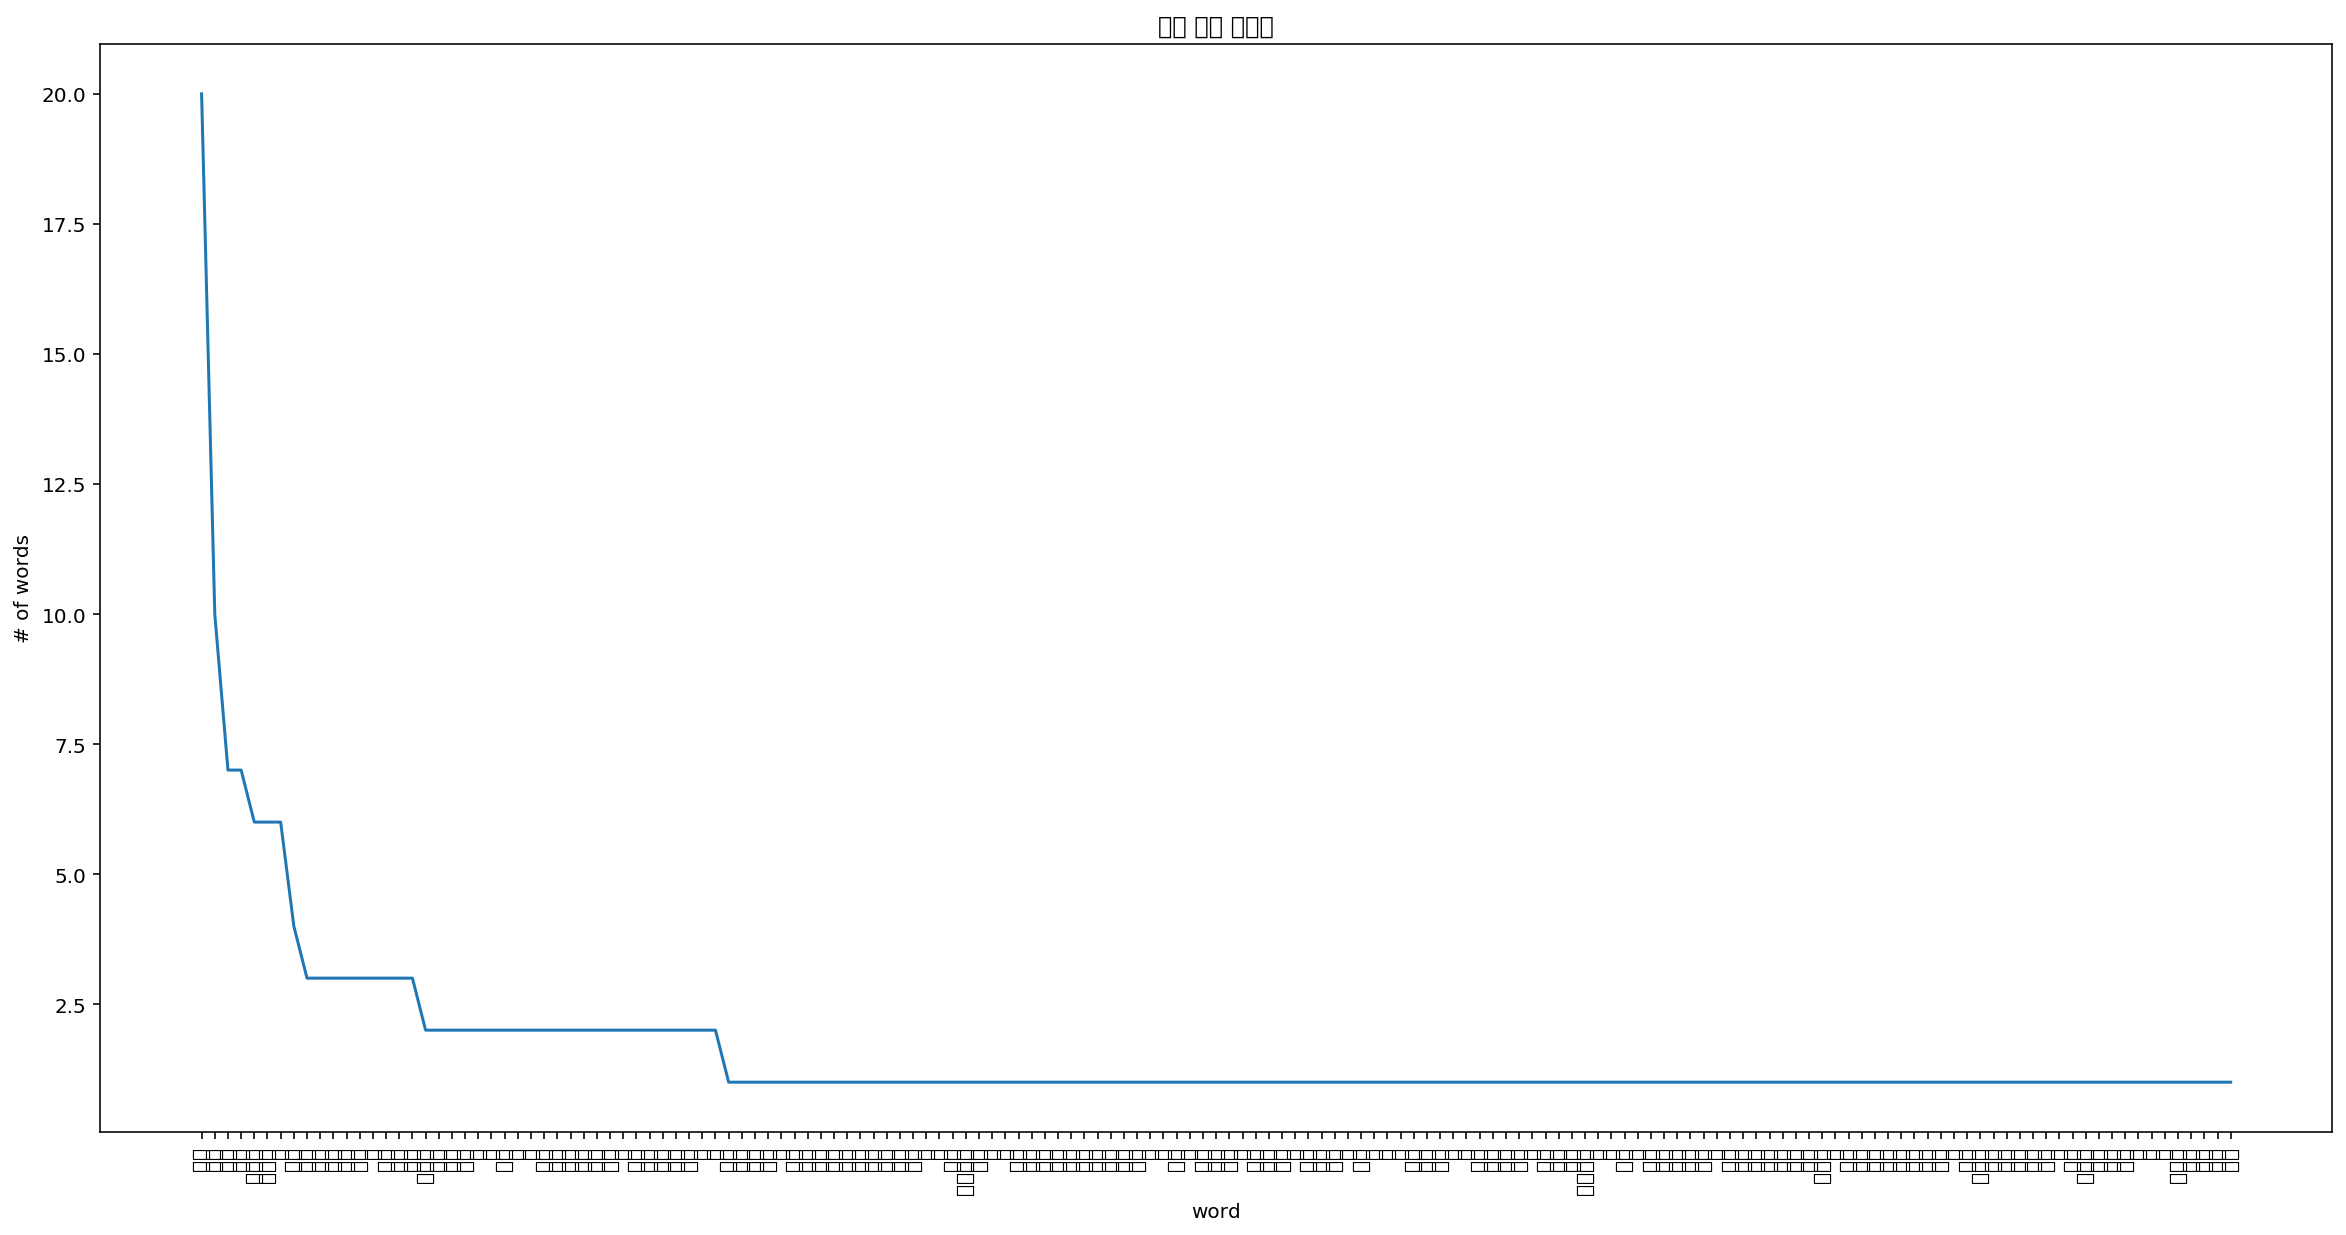

In [45]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.plot(list(sorted_list.keys()), list(sorted_list.values()))
plt.title("일반 명사 빈도수")
plt.ylabel("# of words")
plt.xlabel("word")
plt.show()

In [46]:
count_list=Counter(nnp)
print(len(count_list))

17


In [0]:
# counter안의 value를 sort해줌
sorted_list=count_list.most_common()
# 다시 dictionary 형태로 변환
sorted_list=OrderedDict(sorted_list)

In [48]:
sorted_list

OrderedDict([('류승룡', 6),
             ('진선규', 4),
             ('이동휘', 4),
             ('이하늬', 3),
             ('신하균', 3),
             ('빅리그', 3),
             ('홍콩', 3),
             ('이병헌', 2),
             ('한국', 2),
             ('씬', 1),
             ('스틸러', 1),
             ('오정세', 1),
             ('알바로', 1),
             ('노', 1),
             ('지루함', 1),
             ('주성치', 1),
             ('앰', 1)])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

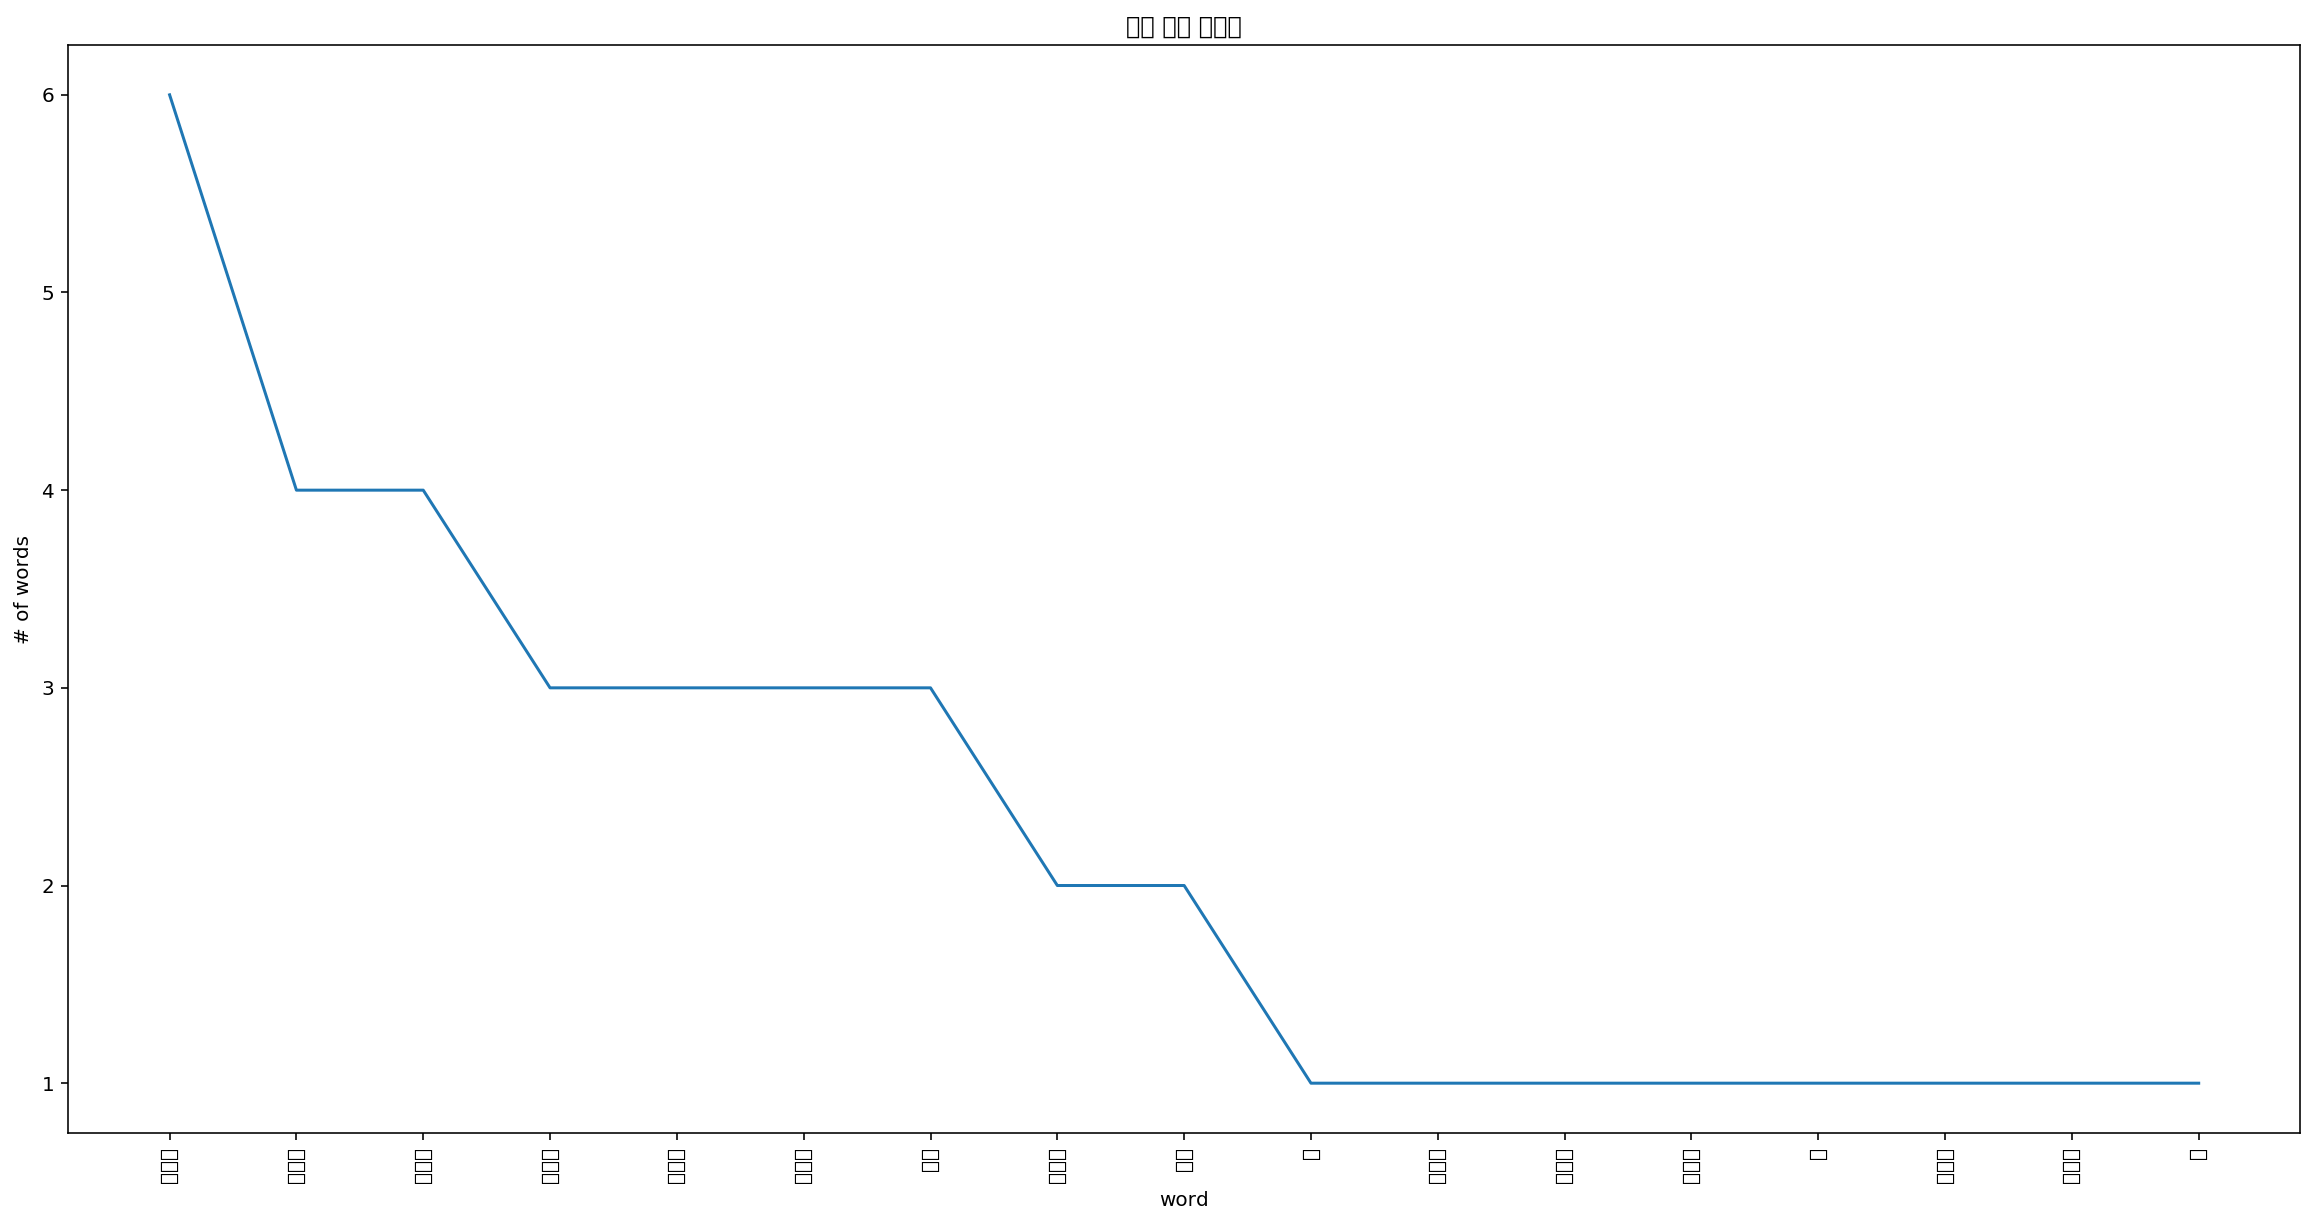

In [49]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.plot(list(sorted_list.keys()), list(sorted_list.values()))
plt.title("고유 명사 빈도수")
plt.ylabel("# of words")
plt.xlabel("word")
plt.show()

In [50]:
mecabsplit

<function __main__.mecabsplit>

In [51]:
import codecs
def read_data(filename):
    with codecs.open(filename, 'r', 'utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

train_data = read_data('/content/gdrive/My Drive/dongguk_nlp/nsm/small_ratings_train.txt')
test_data = read_data('/content/gdrive/My Drive/dongguk_nlp/nsm/small_ratings_test.txt')

print(len(train_data))
print(len(test_data))
print (train_data[0])
print (test_data[0])

10000
100
['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0']
['7898805', '음악이 주가 된, 최고의 음악영화', '1']


In [52]:
%%time
# Open-text 형태소 분석기 import
import MeCab
tagger = MeCab.Tagger()

def tokenize(doc):
    return ' '.join(mecabsplit(tagger, doc, False))
    #return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]
#print (train_data[0])
#line = mecabsplit(tagger,train_data[0][1],False)


#train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
train_docs_X = [tokenize(row[1]) for row in train_data] # 1 document
train_Y = [row[2] for row in train_data] # 2 label 

test_docs_X = [tokenize(row[1]) for row in test_data]
test_Y = [row[2] for row in test_data]


CPU times: user 1.05 s, sys: 2.76 ms, total: 1.05 s
Wall time: 1.05 s


In [53]:
print(train_docs_X[0])
print(train_Y[0])
print(train_docs_X[1])
print(train_Y[1])

원작 의 긴장 감 을 제대로 살리 어 내 지 못하 았 다 .
0
액션 이 없 는데 도 재미 있 는 몇 안 되 는 영화
1


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features = 1000).fit(train_docs_X) #countvectorizer id 부여하고 정렬하고 count셈 

train_X = vec.transform(train_docs_X).toarray()
test_X = vec.transform(test_docs_X).toarray()


In [57]:
print(train_X[0])
print(len(train_X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [62]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(train_X, train_Y)

print("Accuracy on training set: {:.3f}".format(gnb.score(train_X, train_Y)))
print("Accuracy on test set: {:.3f}".format(gnb.score(test_X, test_Y)))

Accuracy on training set: 0.723
Accuracy on test set: 0.710
CPU times: user 328 ms, sys: 94 ms, total: 422 ms
Wall time: 478 ms


In [63]:
np.unique(train_X[0], return_counts=True)

(array([0, 1]), array([995,   5]))

In [64]:
train_docs_X[0]

'원작 의 긴장 감 을 제대로 살리 어 내 지 못하 았 다 .'

In [65]:
pos = [ [test_docs_X[i], test_Y[i], gnb.predict([test_X[i]]) ] for i in range(len(test_Y)) if test_Y[i] == '1' ]
neg = [ [test_docs_X[i], test_Y[i], gnb.predict([test_X[i]]) ] for i in range(len(test_Y)) if test_Y[i] == '0' ]
#crr= []
#for i in range(len(test_Y)):
#    if test_Y[i] == '1':
#        crr.append([test_docs_X[i], test_Y[i], gnb_predict([test_X[i]]) ])
#print (crr)
print ('Predicted as Positive:')
for i in pos[:5]:
    print ('입력', i[0])
    print ('정답', i[1])
    print ('출력', i[2])
print ('\nPredicted as Negative:')
for i in neg[:5]:
    print ('입력', i[0])
    print ('정답', i[1])
    print ('출력', i[2])


Predicted as Positive:
입력 음악 이 주 가 되 ᆫ , 최고 의 음악 영화
정답 1
출력 ['1']
입력 괜찮 네요 오랜 만 포켓몬스터 잼 밌어요
정답 1
출력 ['1']
입력 청춘 은 아름답 다 그 아름답 ᄆ 은 이성 을 흔들 어 놓 는다 . 찰나 의 아름답 ᄆ 을 잘 포착 하 ᆫ 섬세 하 고 아름답 ᆫ 수채 화 같 은 퀴어 영화 이 다 .
정답 1
출력 ['1']
입력 눈 에 보이 는 반전 이 었 지만 영화 의 흡인 력 은 사라지 지 않 았 다 .
정답 1
출력 ['0']
입력 최고 ! !!!!!!!!!!!!!!!
정답 1
출력 ['1']

Predicted as Negative:
입력 뭣 이 야 이 평점 들 은 . ... 나쁘 지 ㄴ 않 지만 10 점 짜리 는 더더욱 아니 잖아
정답 0
출력 ['1']
입력 지루 하 지 는 않 은데 완전 막장 이 ᄆ . .. 돈 줏 고 보 기 에 는 . ...
정답 0
출력 ['0']
입력 3 D 만 아니 었 어도 별 다섯 개 주 ㅓㅆ 을 터 이 ᆫ데 . . 왜 3 D 로 나오 아서 저 의 심기 를 불편 하 게 않 죠 ? ?
정답 0
출력 ['1']
입력 진정 하 ᆫ 쓰레기
정답 0
출력 ['1']
입력 한국 독립 영화 의 한계 그렇게 아버지 가 되 ᆫ다 와 비교 되 ᄆ
정답 0
출력 ['0']


In [0]:
# KNN 코드
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)

In [70]:
neigh.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
neigh.score(train_X, train_Y)
neigh.score(test_X, test_Y)